In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['figure.dpi'] = 200

Quadratic fit cutpoint with y axis: 254.22198426573553
0.9961280928443317


Text(0,0.5,'Time (us)')

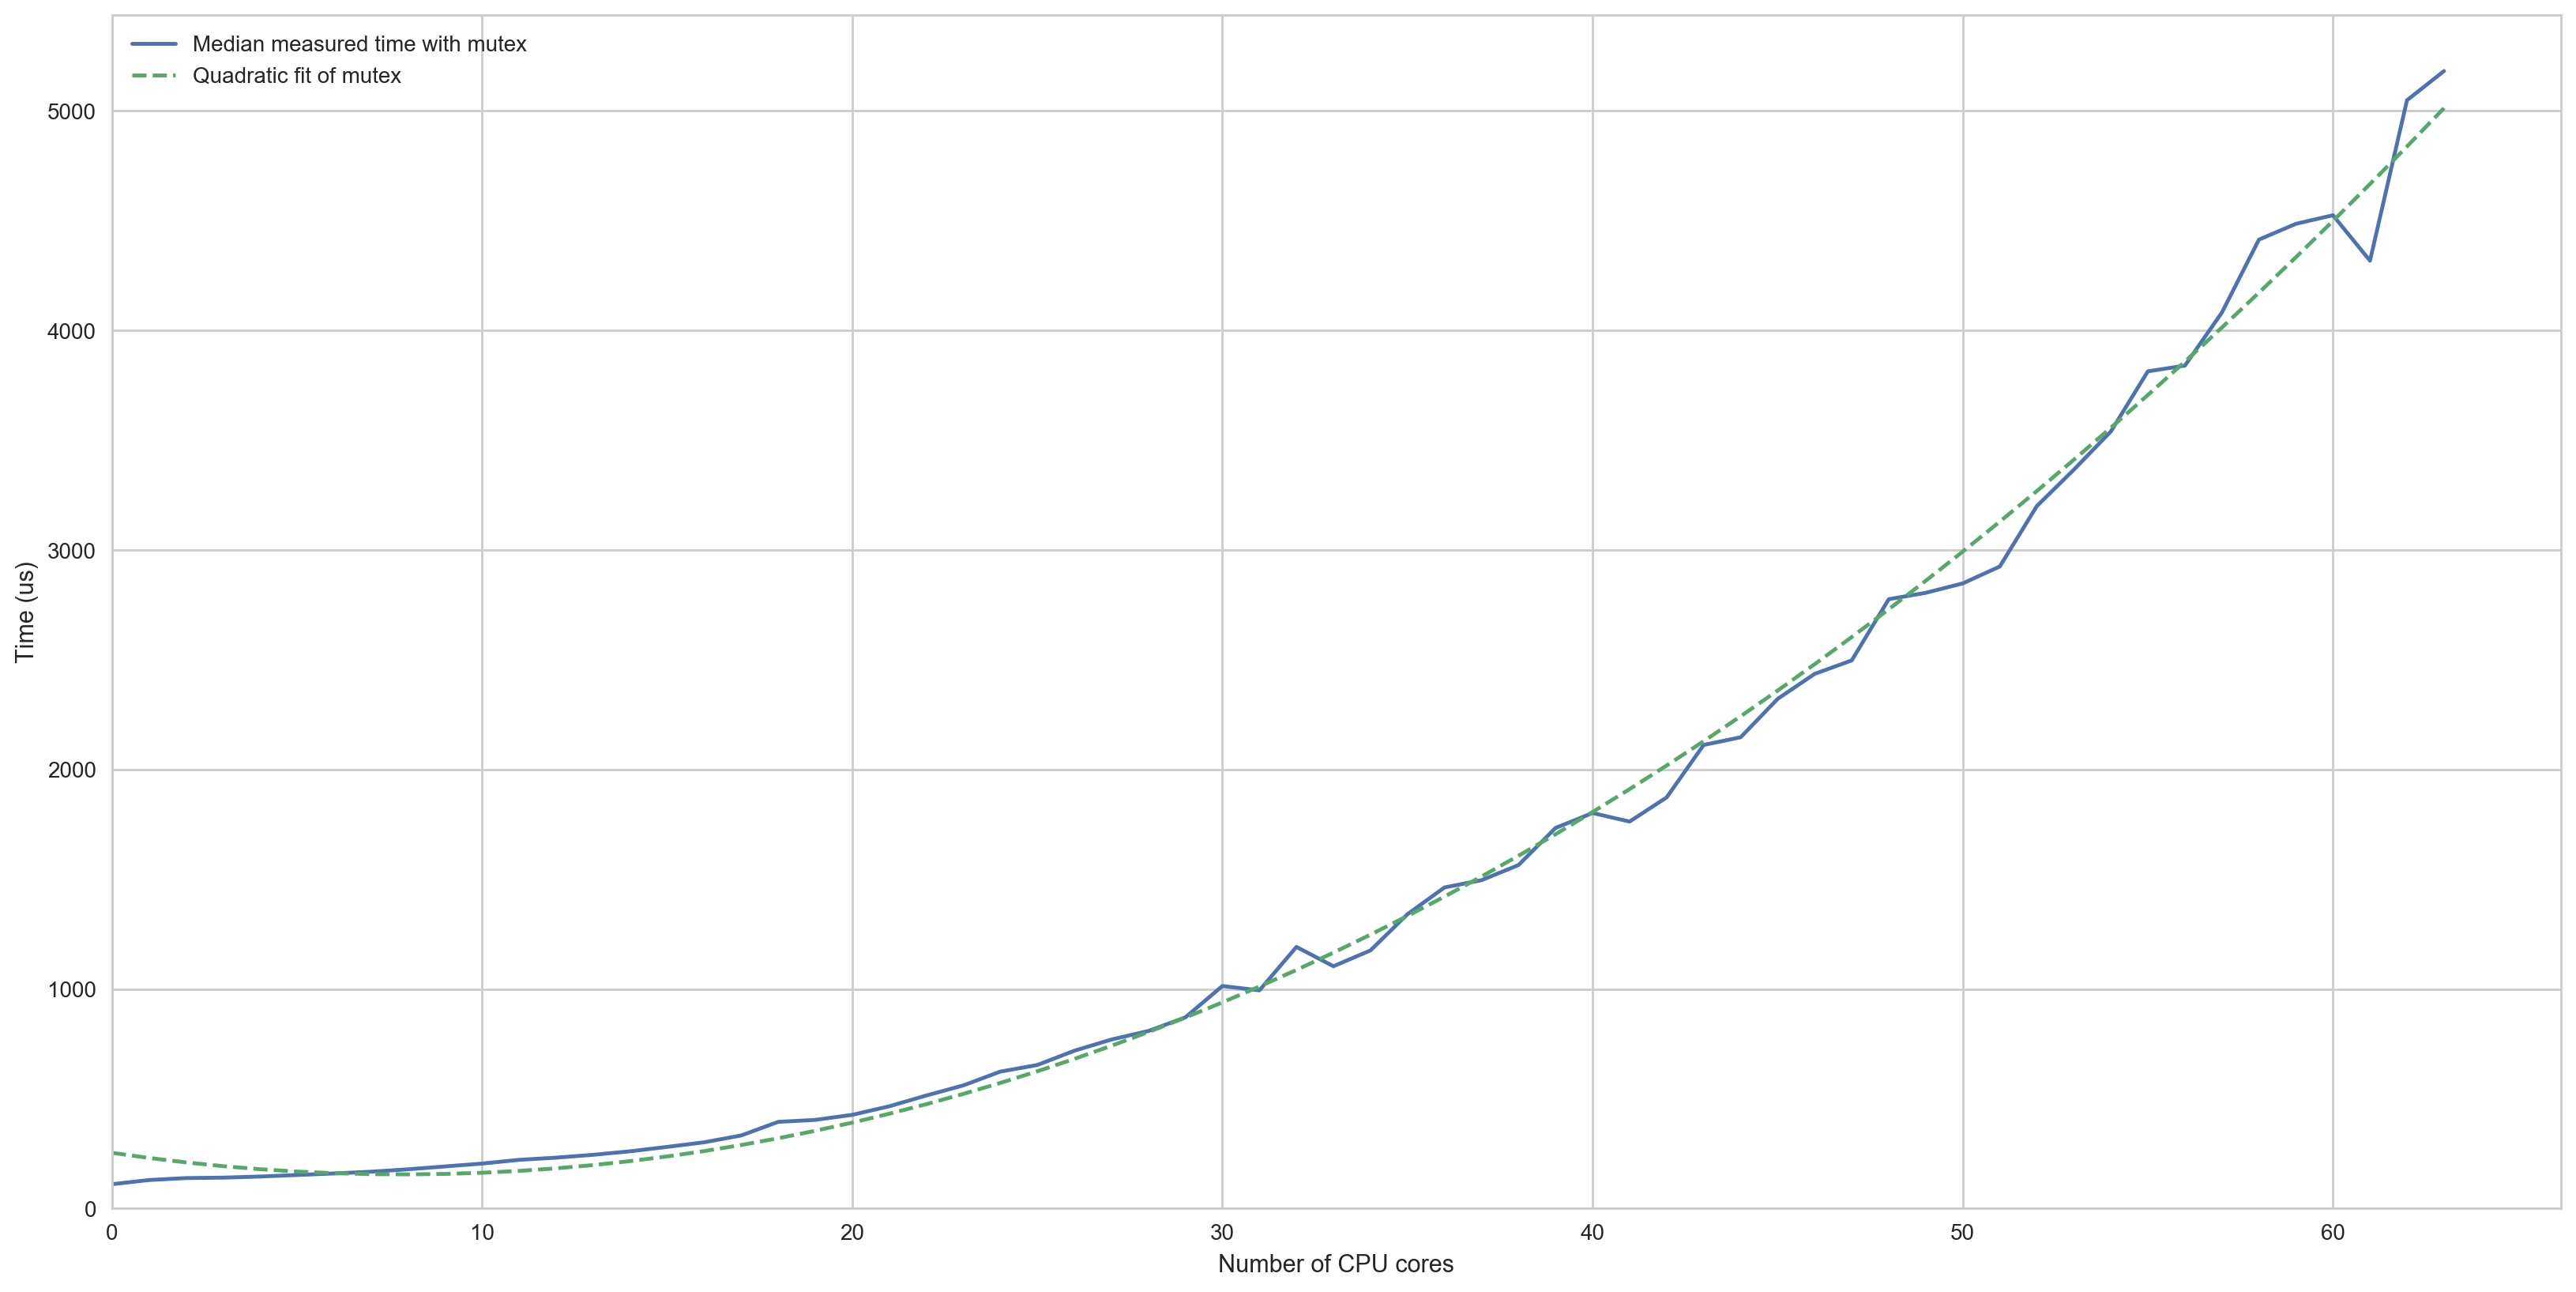

In [5]:
def fit_curve(x, y, f):
    popt, _ = curve_fit(f, x, y)
    p = lambda z: f(z, *popt)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    return {
        'polynomial': lambda x: f(x, *popt),
        'r-squared': ssreg/sstot,
    }

def fit_polynomial(x, y, degree):
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    return {'polynomial': p, 'r-squared': ssreg/sstot}

mutex_data = "111 130 139 141 146 153 160 168 179 192 205 222 232 245 261 281 302 333 395 404 427 466 515 561 624 654 719 770 809 871 1014 994 1192 1104 1176 1341 1463 1496 1565 1734 1802 1763 1873 2112 2147 2322 2436 2497 2776 2805 2848 2925 3200 3366 3540 3814 3840 4082 4414 4486 4525 4318 5049 5182"
mutex_data = list(map(int, mutex_data.split(" ")))
mutex_data = [list(range(len(mutex_data))), mutex_data]

plt.plot(*mutex_data, label='Median measured time with mutex')


fit = fit_polynomial(*mutex_data, 2)

linear_fit = plt.plot(mutex_data[0], fit['polynomial'](mutex_data[0]), '--', label='Quadratic fit of mutex')

cutpoint = fit['polynomial'](0)
print("Quadratic fit cutpoint with y axis:", cutpoint)

print(fit['r-squared'])

axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

0.9709712057258335
 
10.01 x + 108.9


Text(0,0.5,'Time (us)')

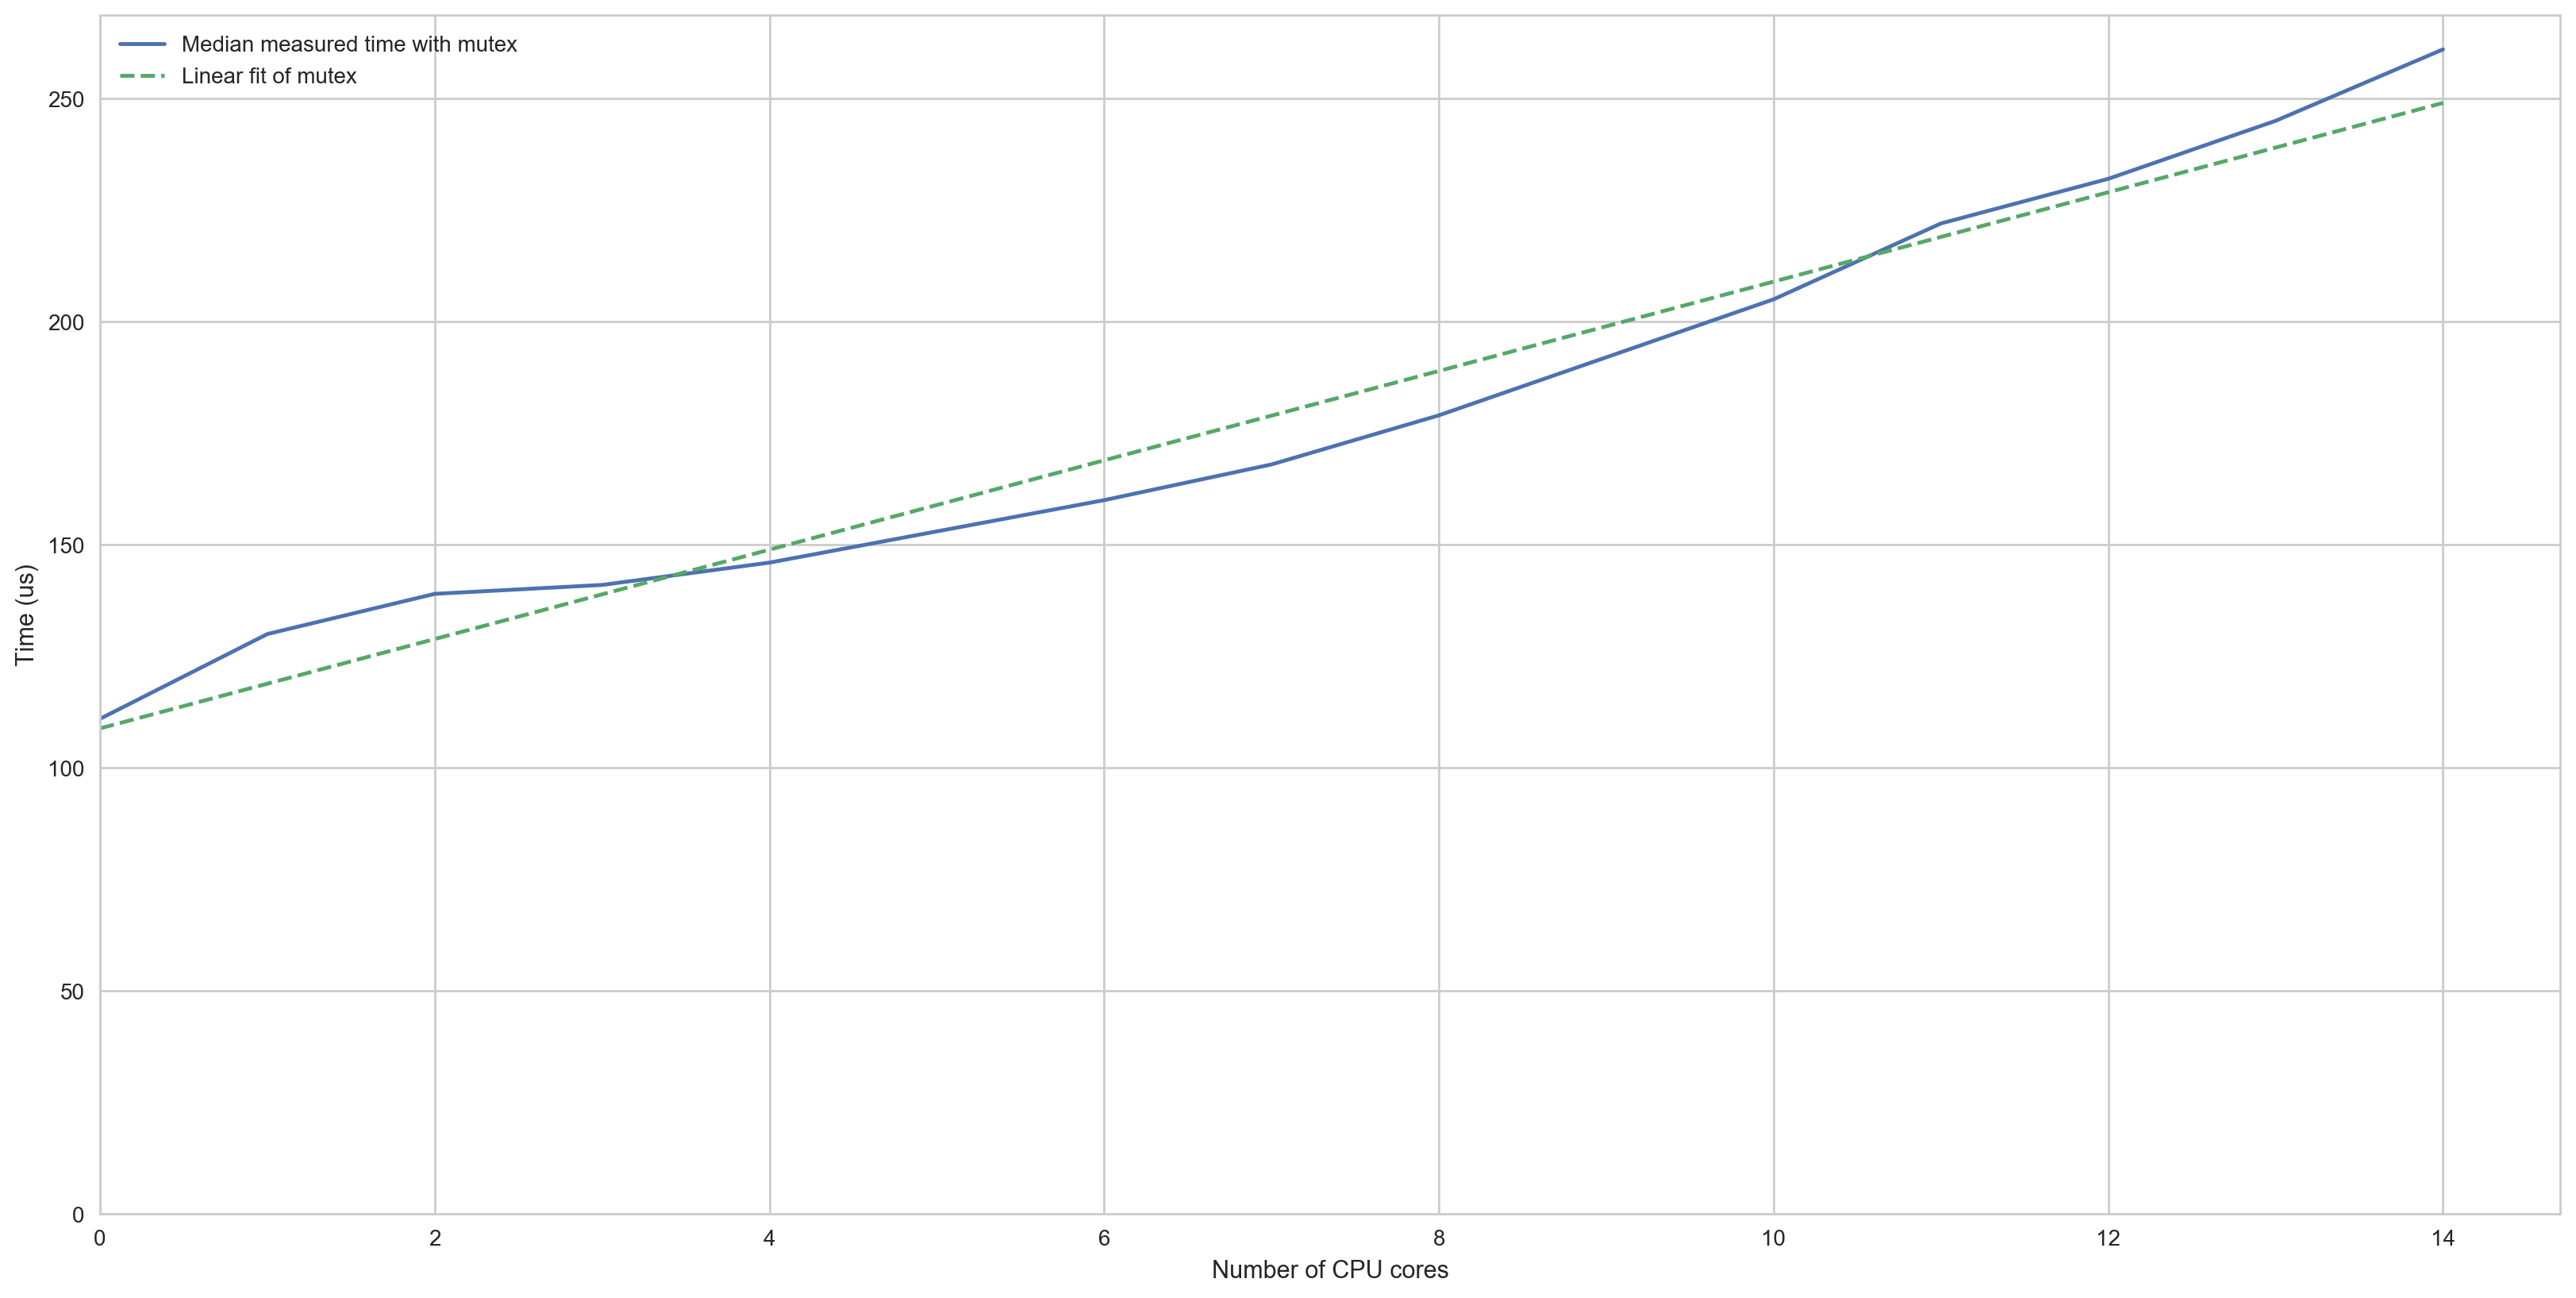

In [6]:
cutoff = 15
mutex_data_cut = [mutex_data[0][:cutoff], mutex_data[1][:cutoff]]

plt.plot(*mutex_data_cut, label='Median measured time with mutex')

fit = fit_polynomial(*mutex_data_cut, 1)

linear_fit = plt.plot(mutex_data_cut[0], fit['polynomial'](mutex_data_cut[0]), '--', label='Linear fit of mutex')

print(fit['r-squared'])
print(fit['polynomial'])

axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

0.8772995175926375


Text(0,0.5,'Time (us)')

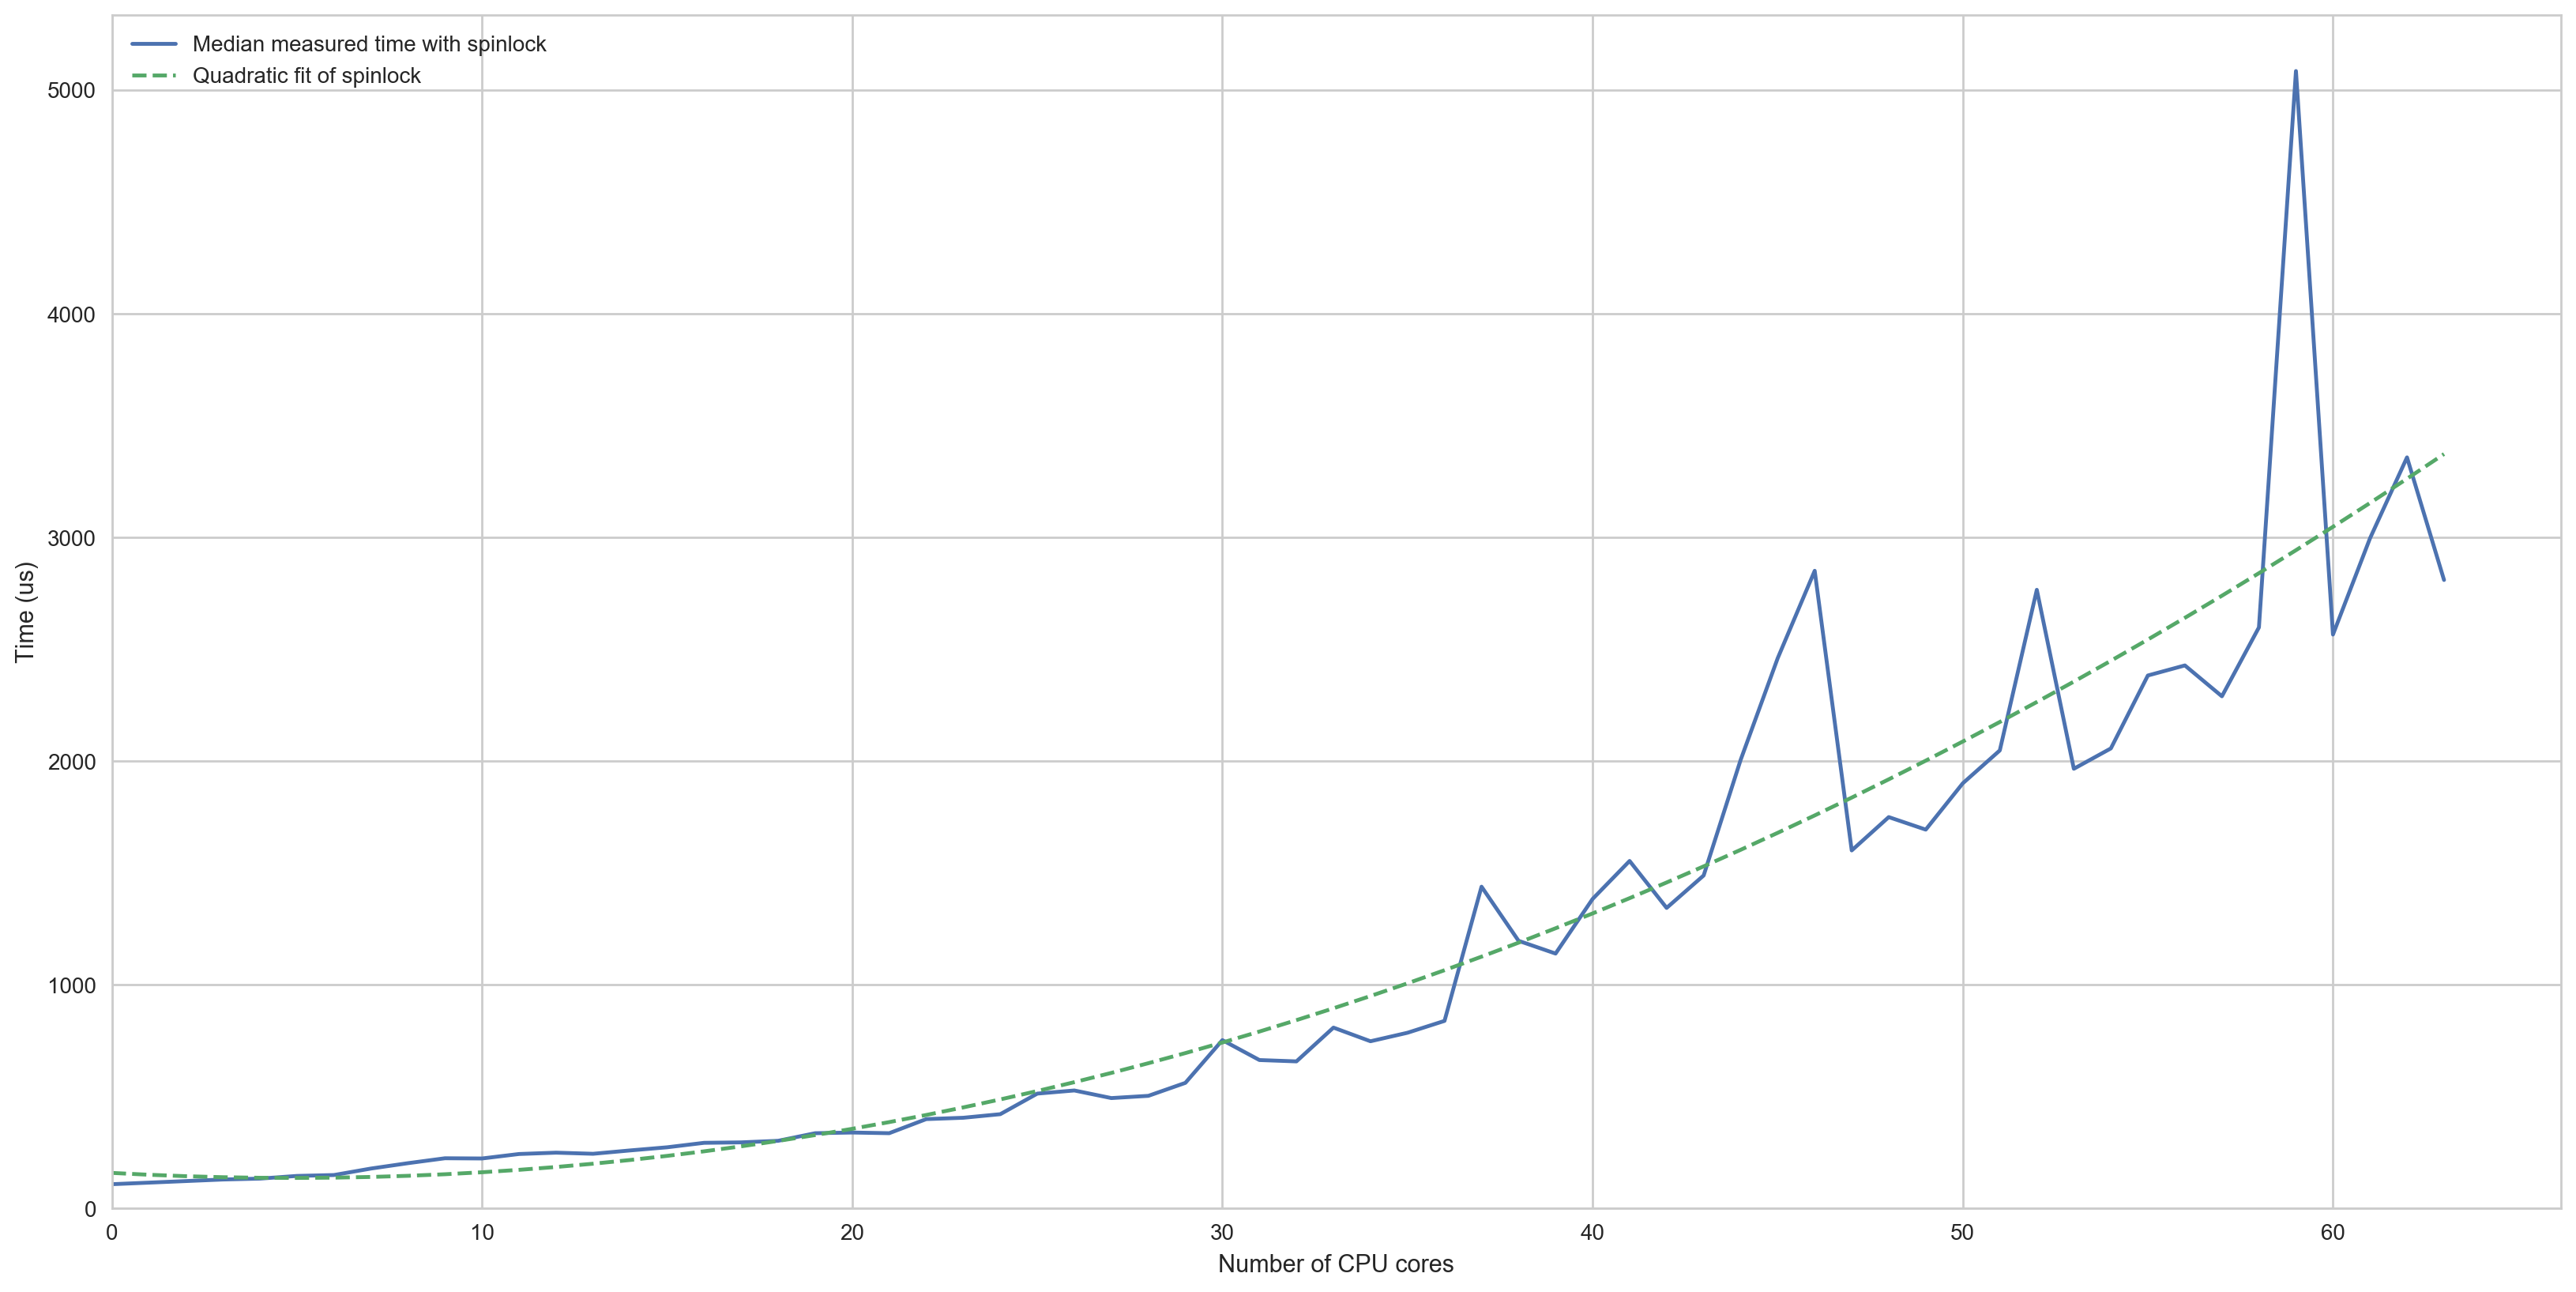

In [7]:
spinlock_data = "109 116 123 130 134 146 150 179 203 225 224 244 250 245 260 274 294 296 303 337 340 337 400 406 422 514 528 494 504 562 753 664 658 809 748 786 839 1439 1197 1140 1384 1554 1344 1489 2006 2460 2851 1601 1750 1694 1901 2048 2766 1966 2057 2383 2428 2290 2598 5085 2566 2996 3358 2810"
spinlock_data = list(map(int, spinlock_data.split(" ")))
spinlock_data = [list(range(len(spinlock_data))), spinlock_data]

plt.plot(*spinlock_data, label='Median measured time with spinlock')

fit = fit_polynomial(*spinlock_data, 2)

linear_fit = plt.plot(mutex_data[0], fit['polynomial'](mutex_data[0]), '--', label='Quadratic fit of spinlock')

print(fit['r-squared'])

axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

0.9601815392078529


Text(0,0.5,'Time (us)')

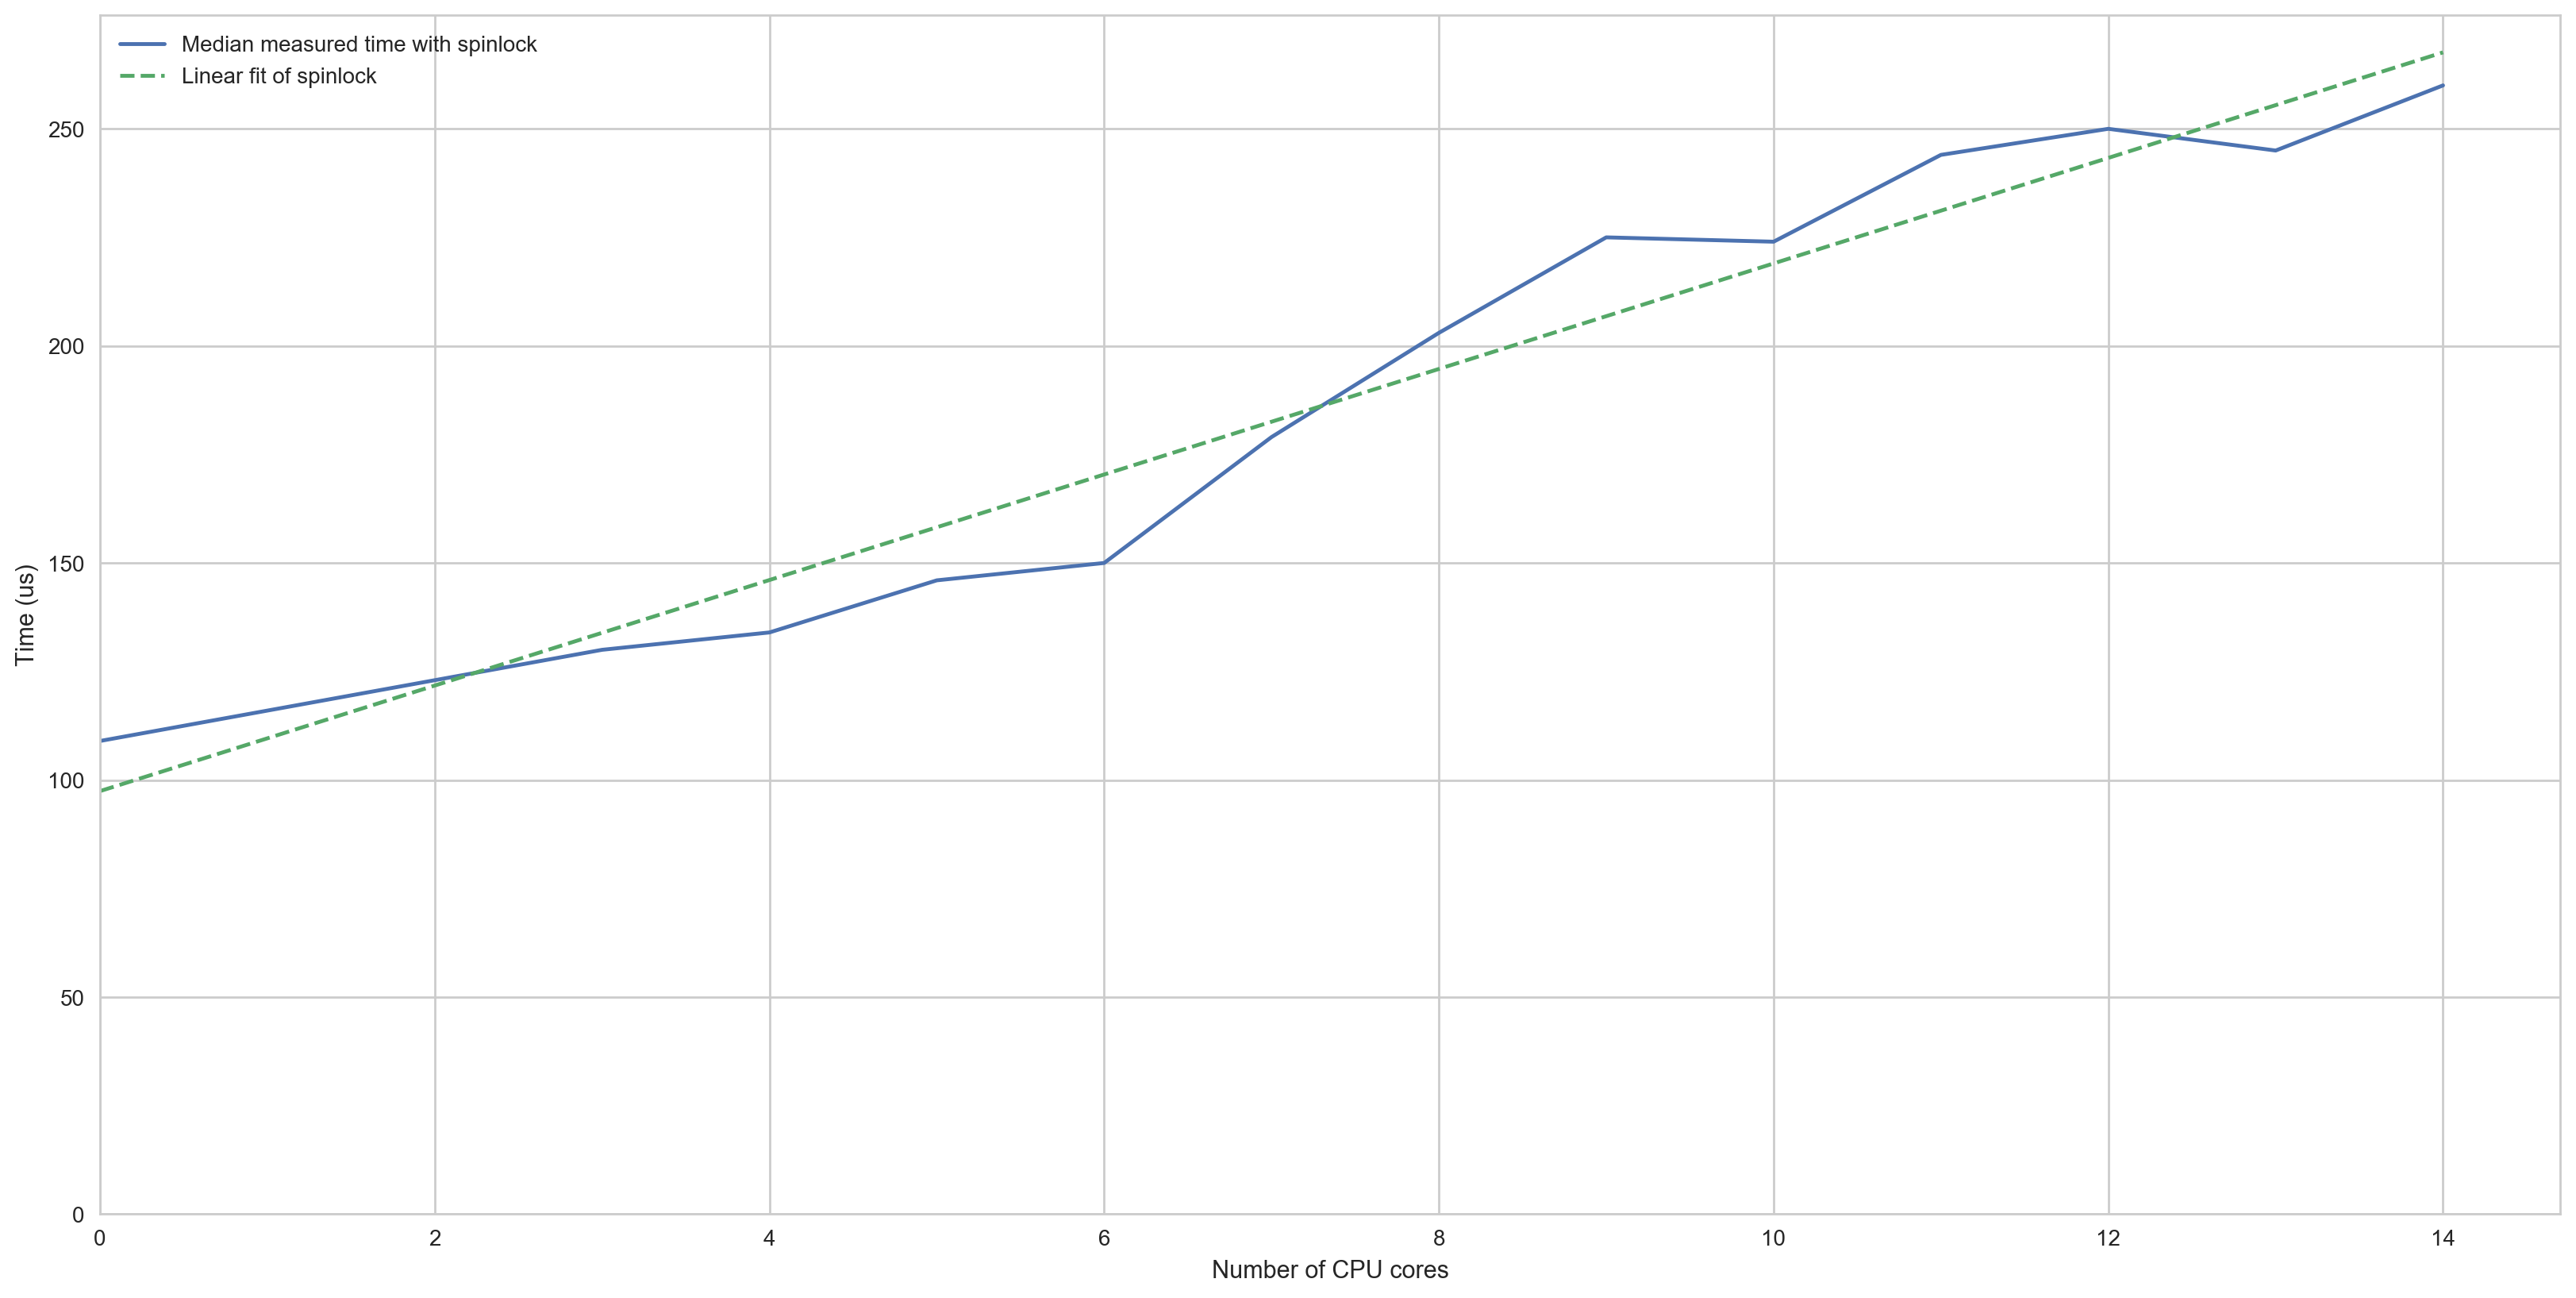

In [8]:
spinlock_data_cut = [spinlock_data[0][:cutoff], spinlock_data[1][:cutoff]]

plt.plot(*spinlock_data_cut, label='Median measured time with spinlock')

fit = fit_polynomial(*spinlock_data_cut, 1)

linear_fit = plt.plot(spinlock_data_cut[0], fit['polynomial'](spinlock_data_cut[0]), '--', label='Linear fit of spinlock')

print(fit['r-squared'])

axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

 
12.15 x + 97.46


Text(0,0.5,'Time (us)')

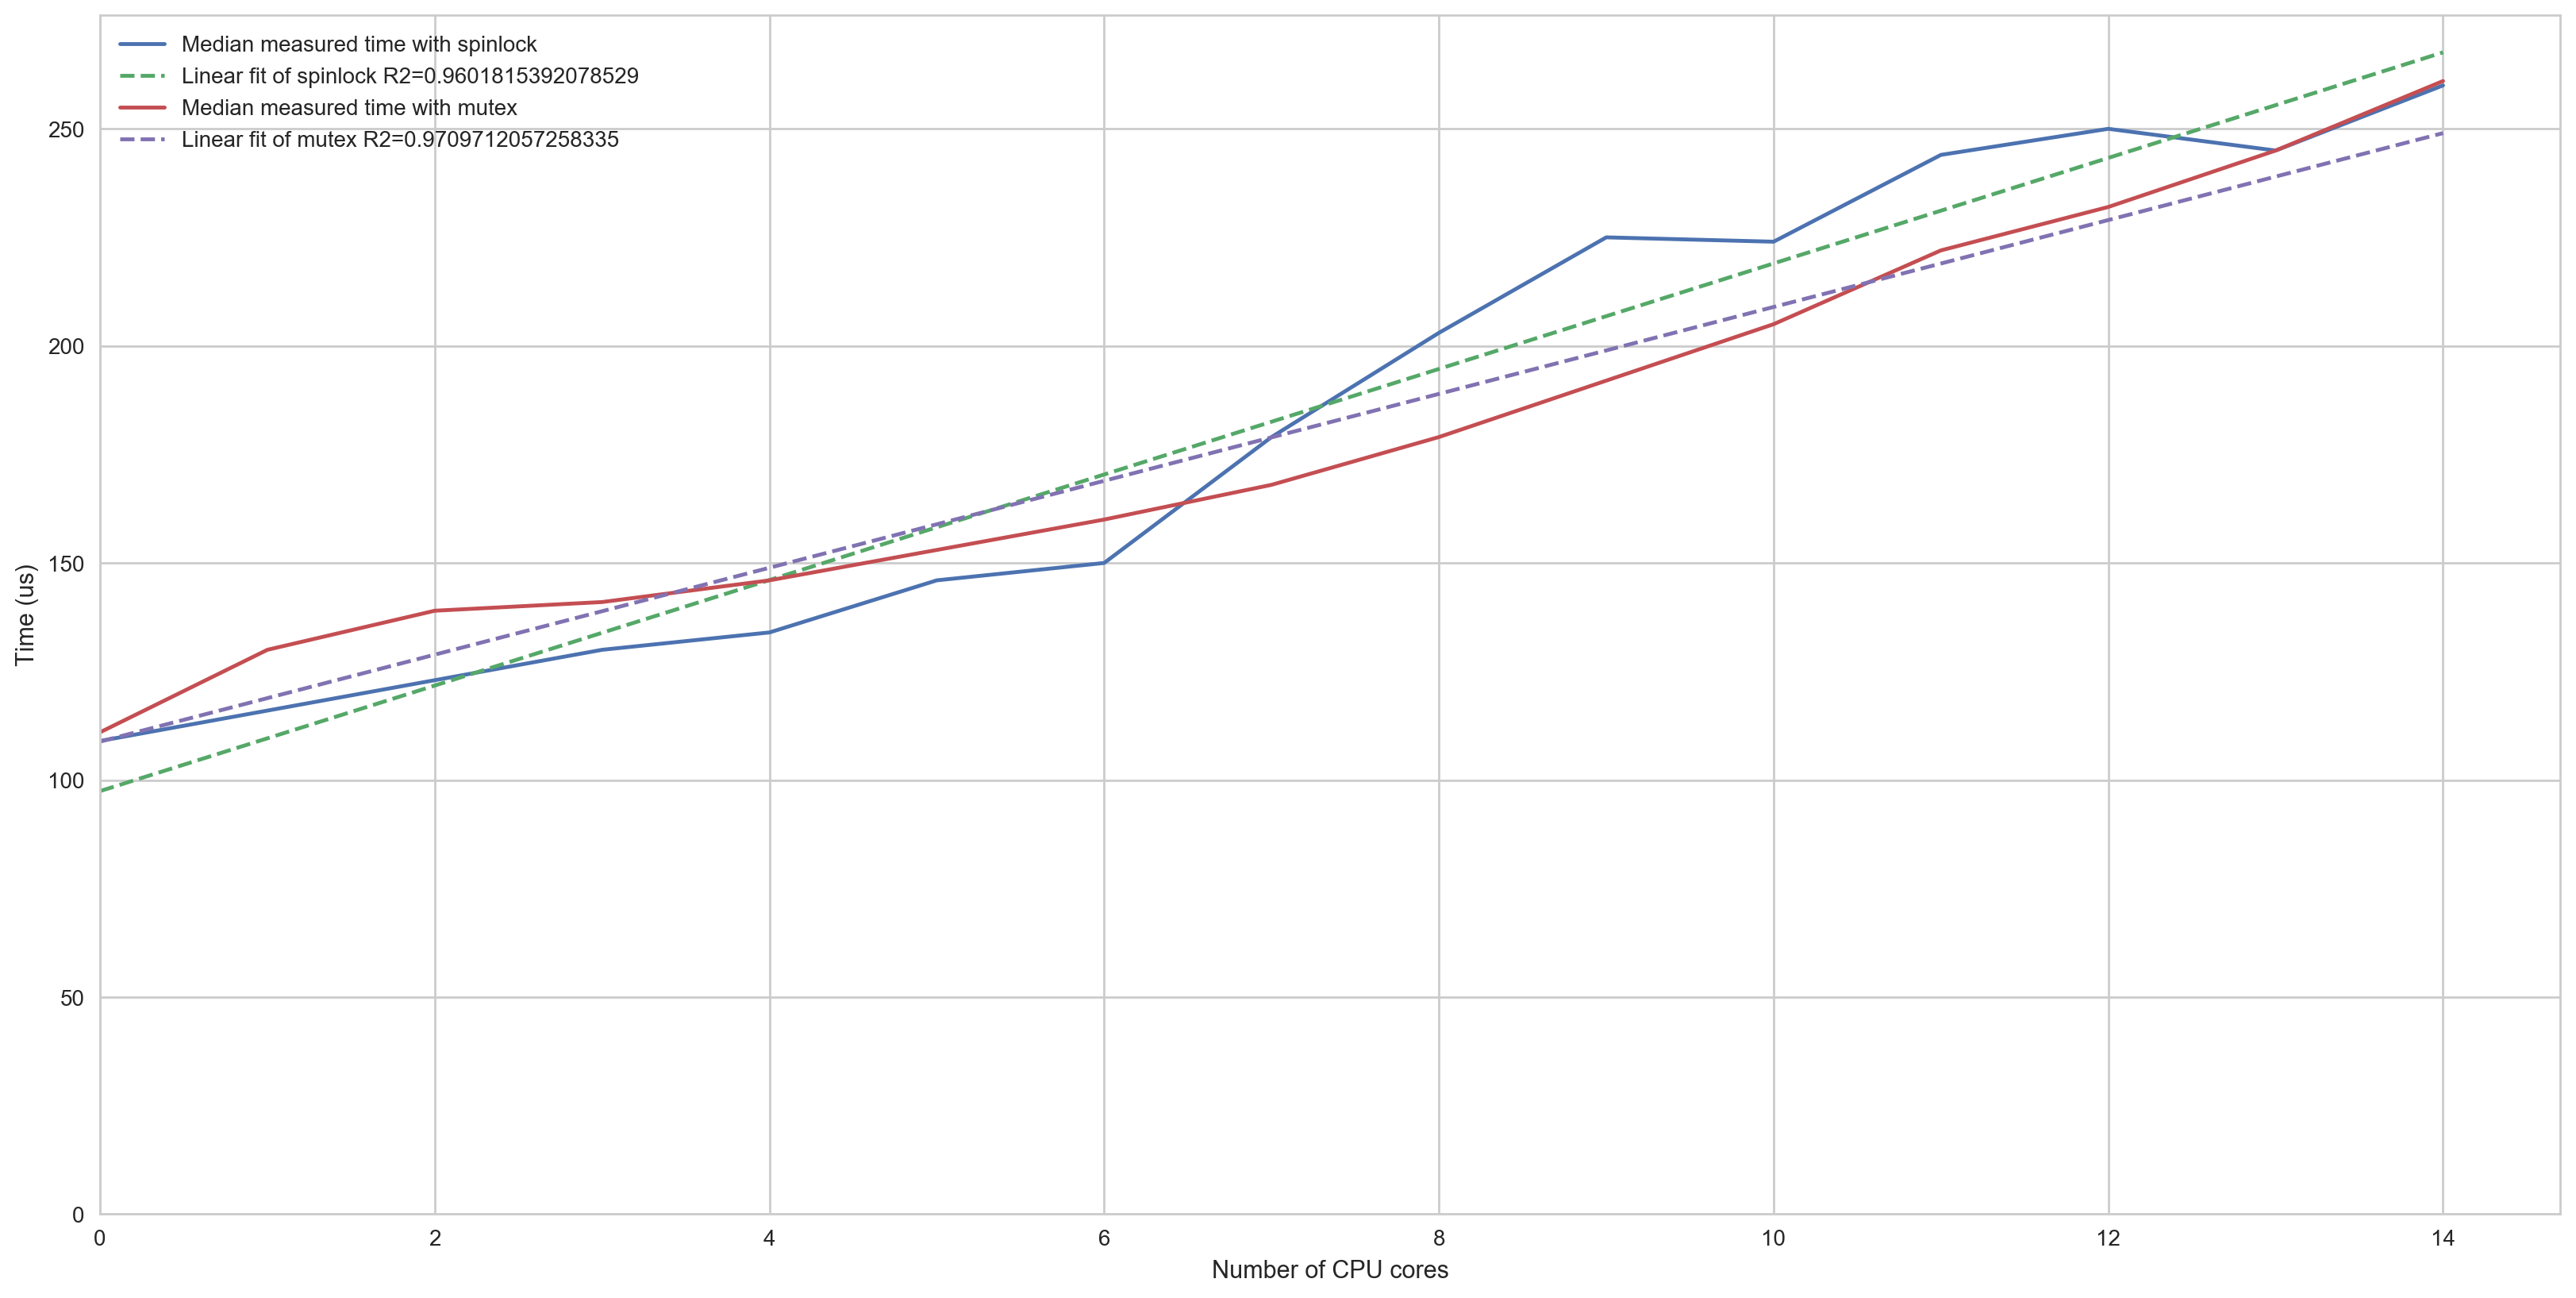

In [9]:
plt.plot(*spinlock_data_cut, label='Median measured time with spinlock')
fit = fit_polynomial(*spinlock_data_cut, 1)
print(fit['polynomial'])
plt.plot(spinlock_data_cut[0], fit['polynomial'](spinlock_data_cut[0]), '--', label='Linear fit of spinlock R2={}'.format(fit['r-squared']))

plt.plot(*mutex_data_cut, label='Median measured time with mutex')
fit = fit_polynomial(*mutex_data_cut, 1)
plt.plot(mutex_data_cut[0], fit['polynomial'](mutex_data_cut[0]), '--', label='Linear fit of mutex R2={}'.format(fit['r-squared']))


axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

0.8898329556706979


Text(0,0.5,'Time (us)')

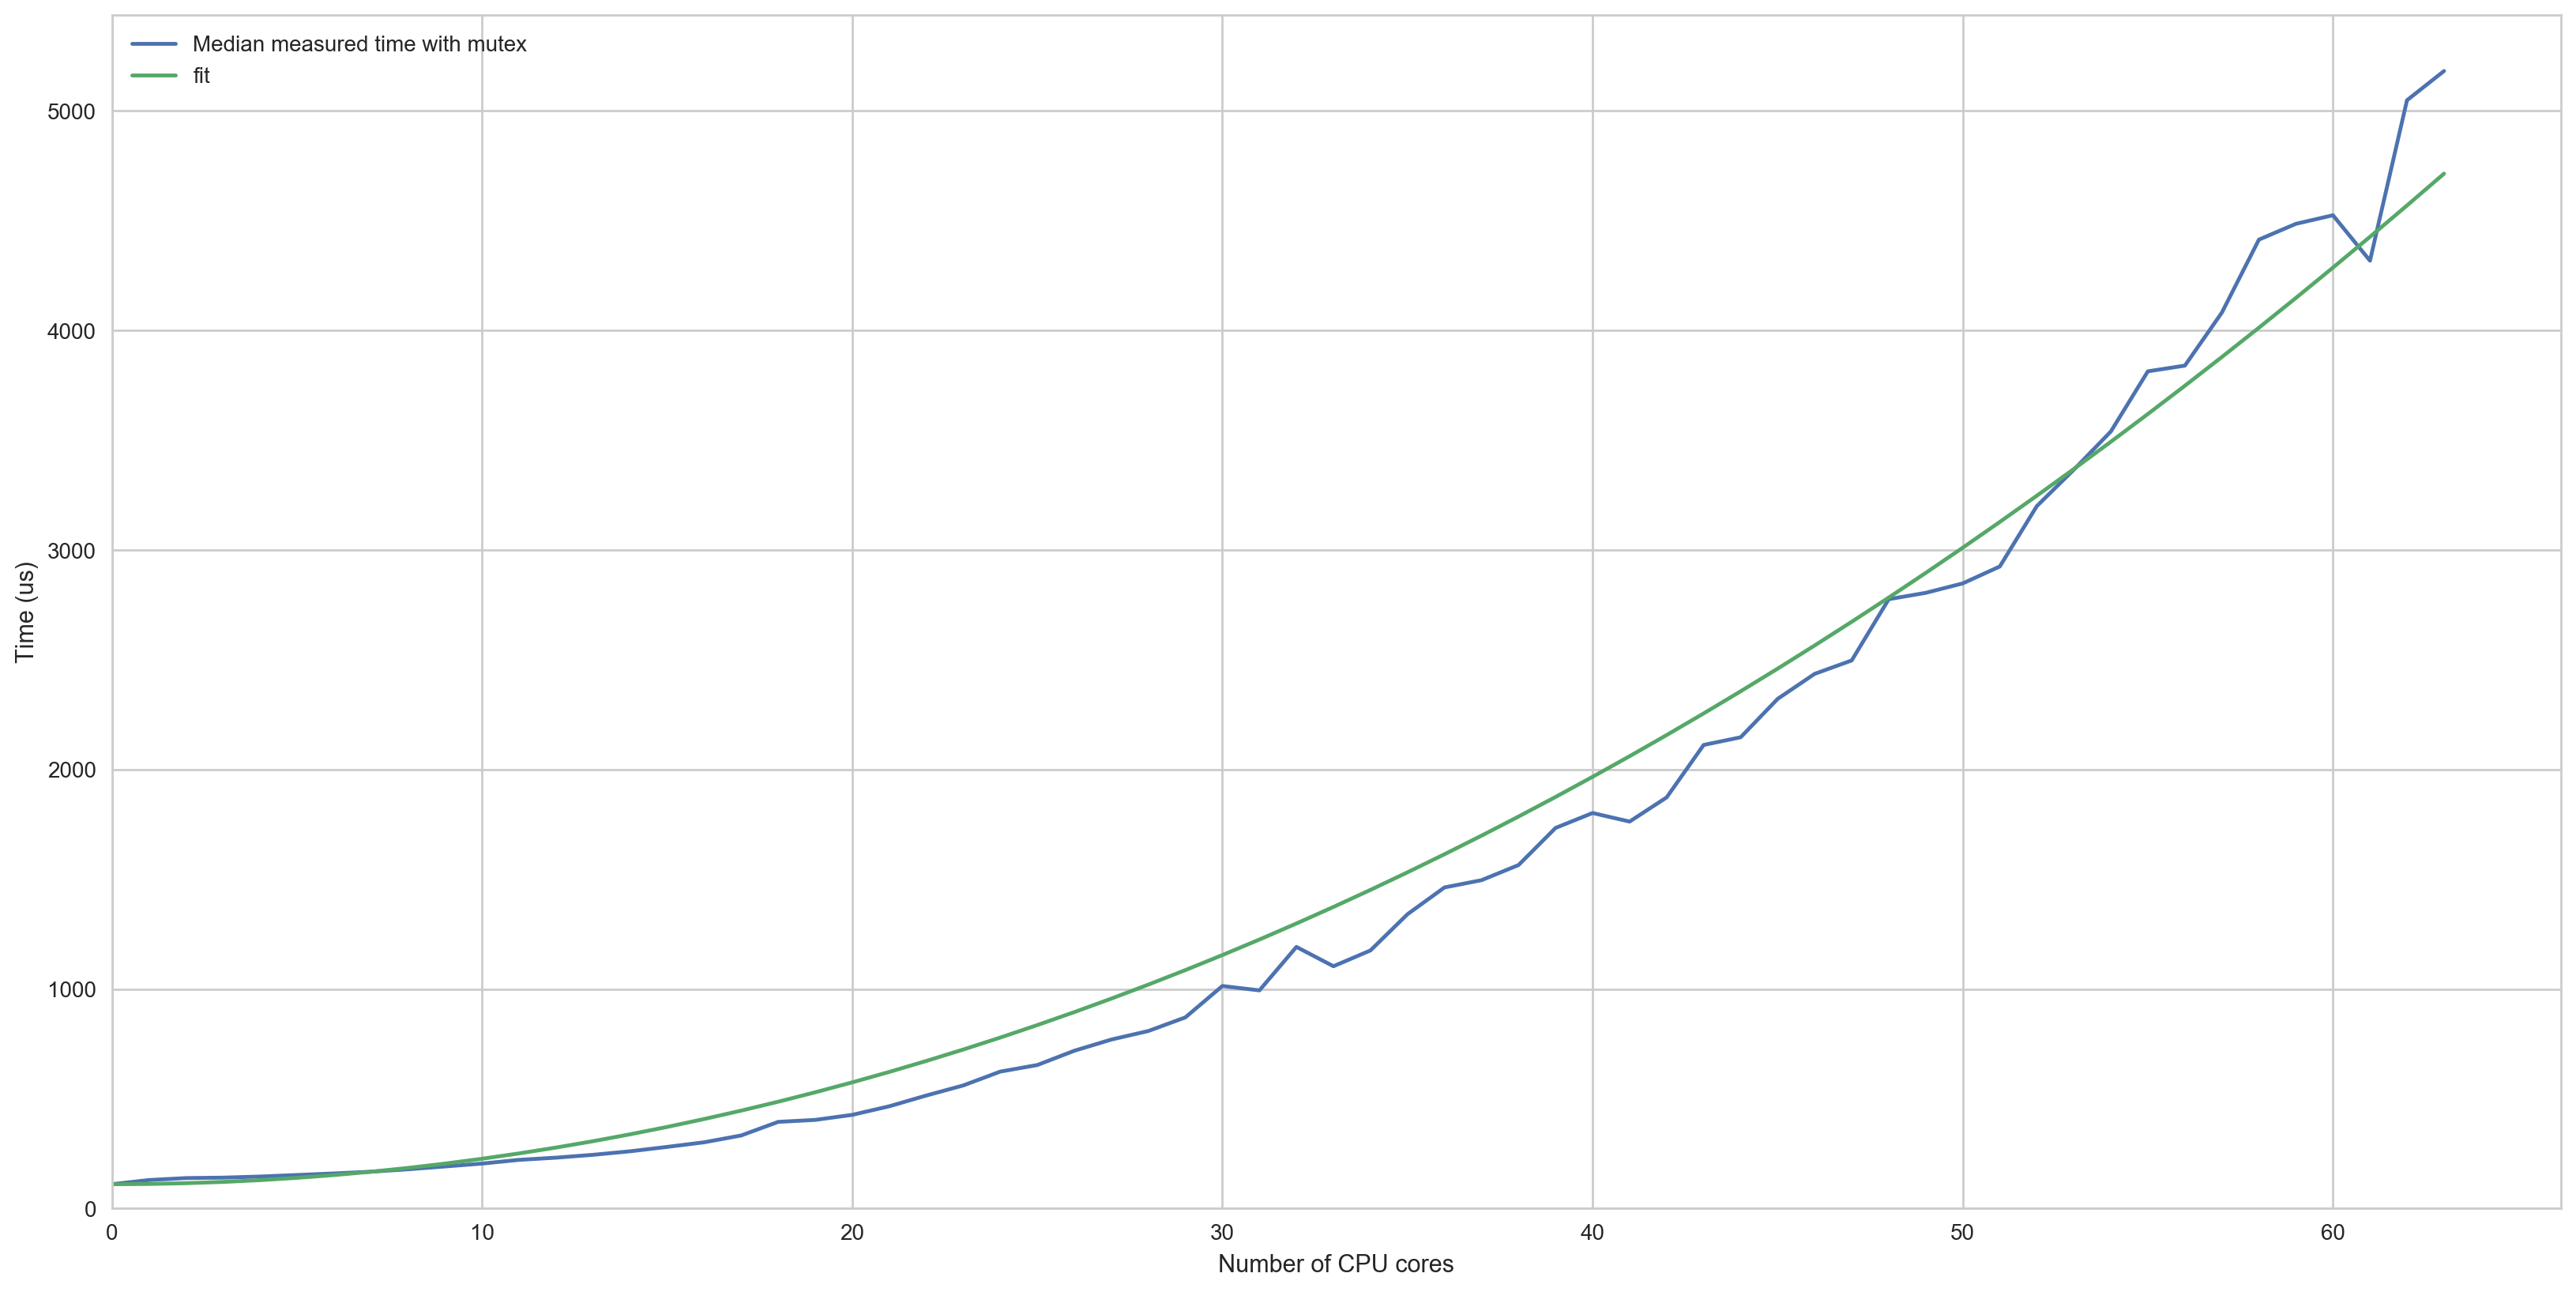

In [10]:
plt.plot(*mutex_data, label='Median measured time with mutex')

def f(x, a, b):
    return a * np.array(x) ** 2 + abs(b) * np.array(x) + mutex_data[1][0]

fit = fit_curve(*mutex_data, f)
print(fit['r-squared'])
plt.plot(mutex_data[0], fit['polynomial'](mutex_data[0]), '-',
         label='fit')

axes = plt.gca()
axes.set_xlim(left=0)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')

(15, 1.9669545068623164)


Text(0,0.5,'Time (us)')

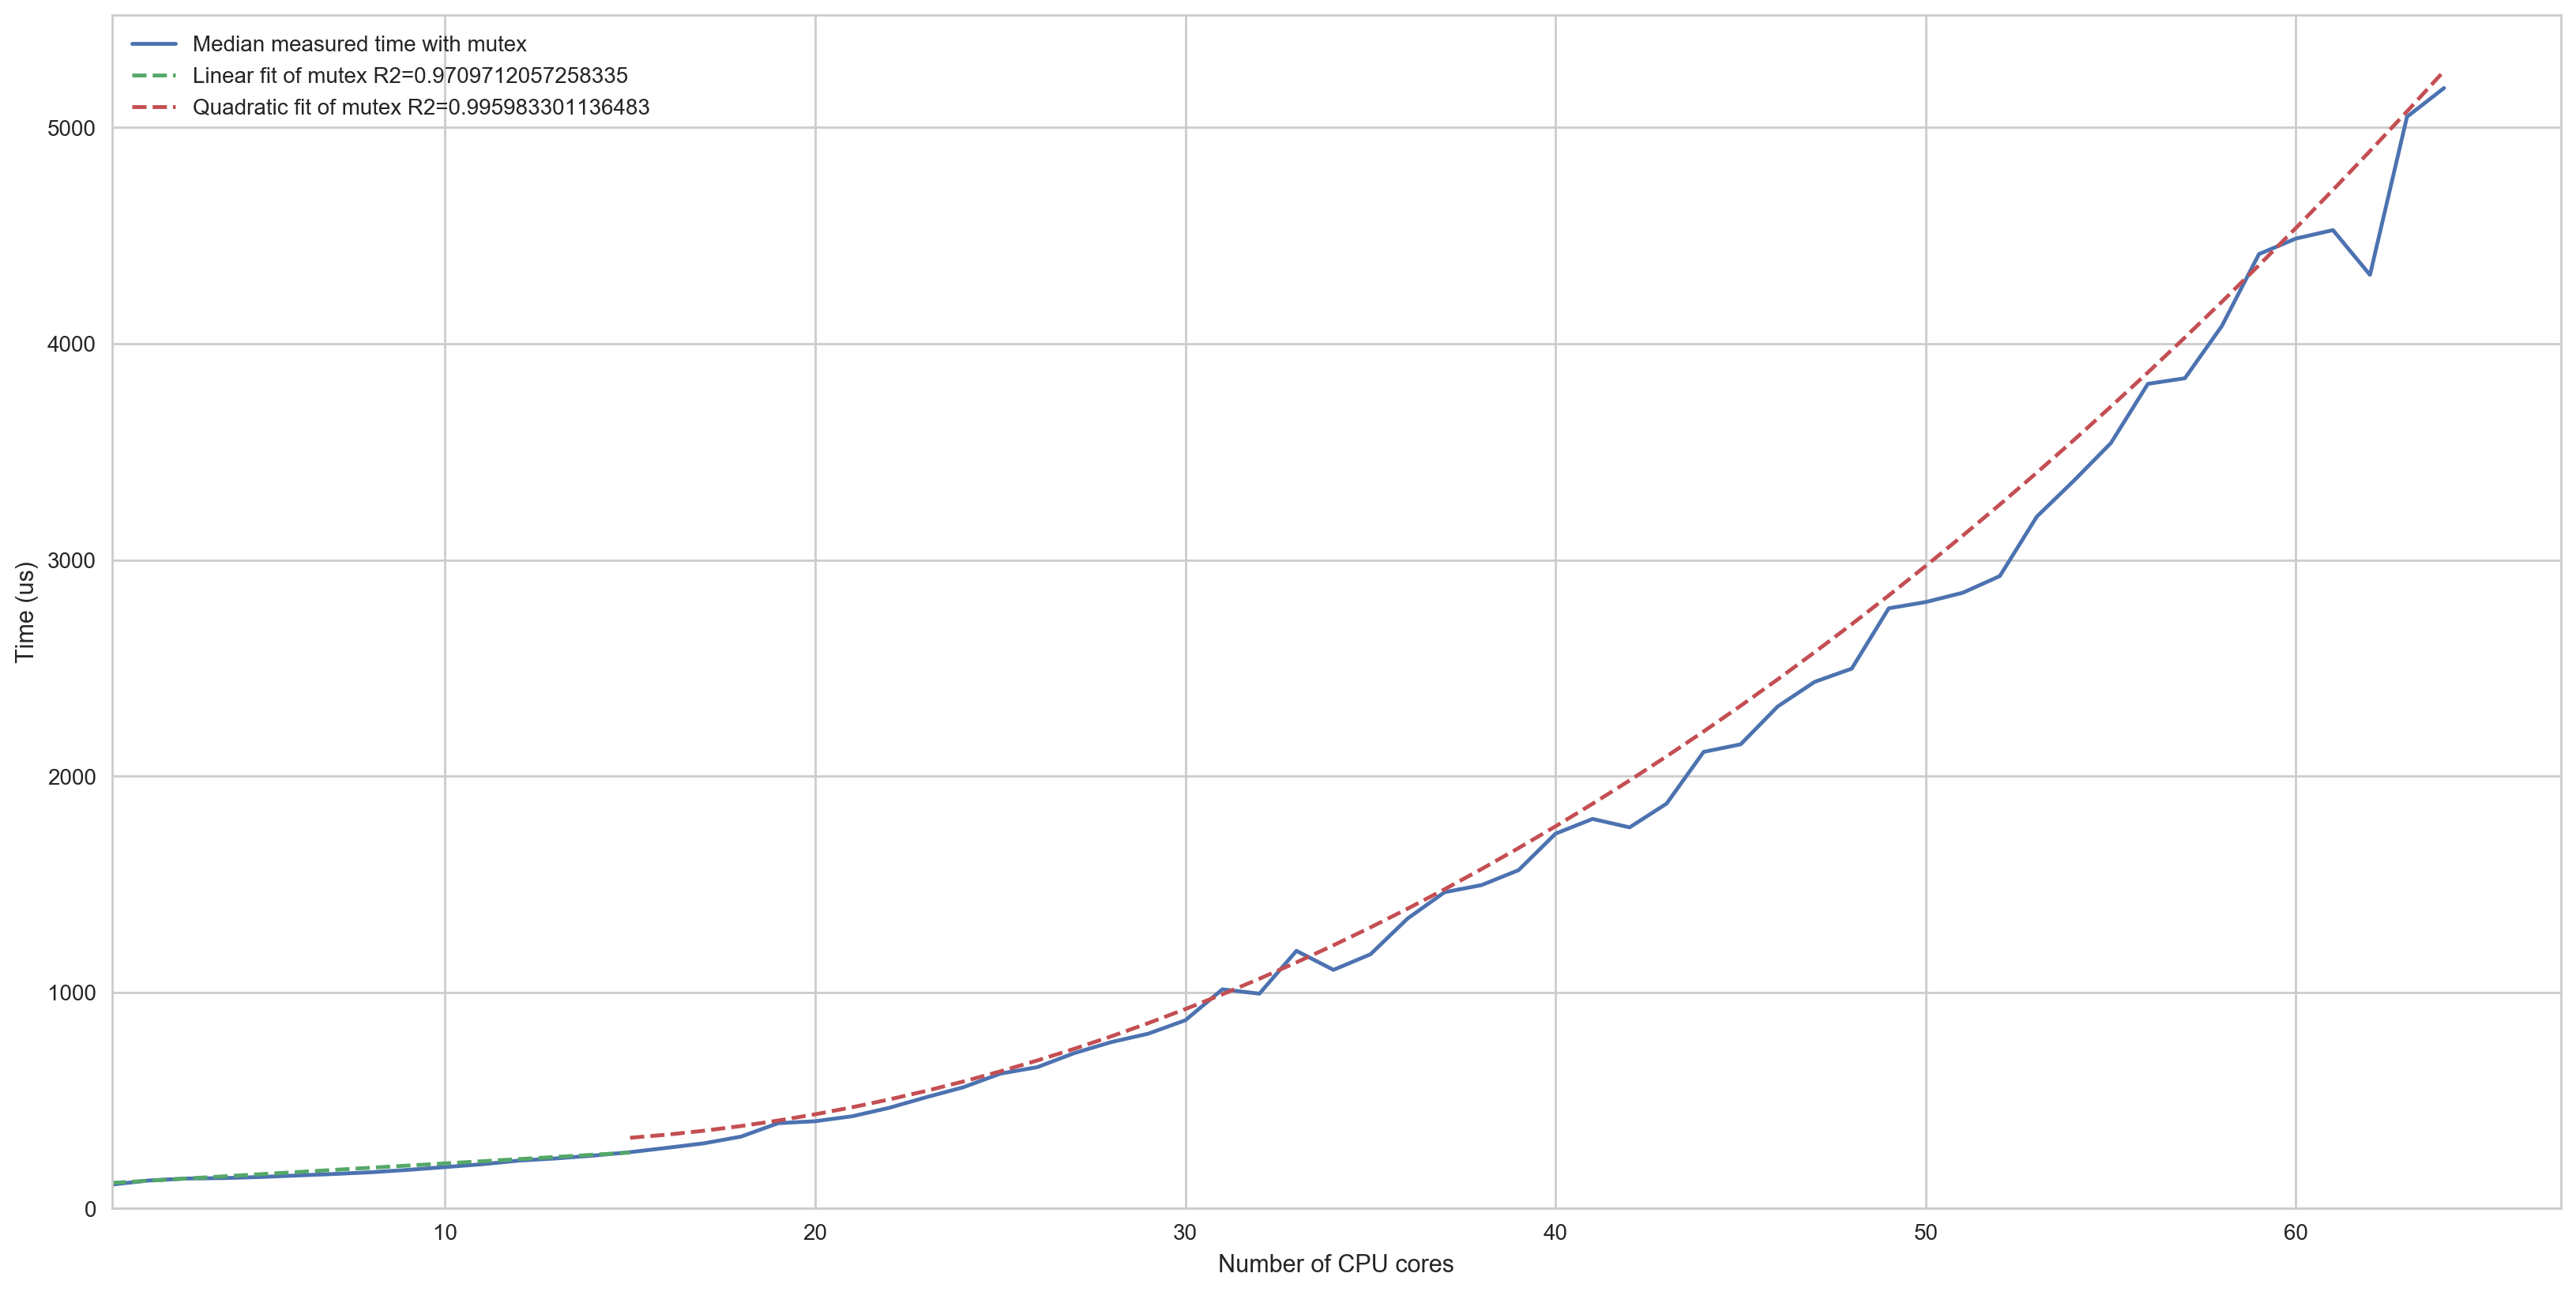

In [11]:
cuts = []
def f(x, a, b, c):
    return a * np.array(x) ** 2 + b * np.array(x) + c

for cut in range(4, len(mutex_data[0]) - 4):    
    fit = fit_polynomial(mutex_data[0][:cut], mutex_data[1][:cut], 1)
    fit2 = fit_curve(mutex_data[0][cut-1:], mutex_data[1][cut-1:], f)
    cuts.append((cut, fit['r-squared'] + fit2['r-squared']))
max_cut = max(cuts, key=lambda x: x[1])
print(max_cut)
max_cut = max_cut[0]

fit = fit_polynomial(mutex_data[0][:max_cut], mutex_data[1][:max_cut], 1)
fit2 = fit_curve(mutex_data[0][max_cut-1:], mutex_data[1][max_cut-1:], f)
mutex_data = [range(1, len(mutex_data[1]) + 1), mutex_data[1]]
plt.plot(*mutex_data, '-', label='Median measured time with mutex')
plt.plot(mutex_data[0][:max_cut], fit['polynomial'](mutex_data[0][:max_cut]), '--', label='Linear fit of mutex R2={}'.format(fit['r-squared']))
plt.plot(mutex_data[0][max_cut-1:], fit2['polynomial'](mutex_data[0][max_cut-1:]), '--', label='Quadratic fit of mutex R2={}'.format(fit2['r-squared']))

axes = plt.gca()
axes.set_xlim(left=1)
axes.set_ylim(bottom=0)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
axes.set_xlabel('Number of CPU cores')
axes.set_ylabel('Time (us)')